In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

df = pd.read_csv('Stephen Curry Regularseason Stats.csv')


In [2]:
#Add month and Day Columns
df[['Month', 'Day']] = df['Date'].str.extract(r'(\d+)/(\d+)')

In [3]:

#Add year1 year2 columns
df[['Start_Year', 'End_Year']] = df['Season_year'].str.split('-', expand=True)

In [4]:
#Cast them into integers
df[['Day', 'Month', 'Start_Year', 'End_Year']] = df[['Day', 'Month', 'Start_Year', 'End_Year']].astype(int)

In [5]:
#Choose between start_year and end_year
df['Actual_Year'] = df.apply(lambda x: x['Start_Year'] if x['Month'] in [10, 11, 12] else x['End_Year'], axis=1)

In [6]:
#Actual_Date
df['Actual_Date'] = df['Day'].astype(str) + '/' + df['Month'].astype(str) + '/' + df['Actual_Year'].astype(str)


In [7]:
df = df.set_index(df['Actual_Date'])

In [8]:
#Head
print(df.head())

            Season_year Season_div      Date  OPP Result  T Score  O Score  \
Actual_Date                                                                  
14/4/2010     2009-2010    Regular  Wed 4/14  POR      W      122      116   
13/4/2010     2009-2010    Regular  Tue 4/13  UTA      L       94      103   
11/4/2010     2009-2010    Regular  Sun 4/11  OKC      W      120      117   
10/4/2010     2009-2010    Regular  Sat 4/10  LAC      L      104      107   
7/4/2010      2009-2010    Regular   Wed 4/7  MIN      W      116      107   

              MIN     FG  FGM  ...  STL  PF TO  PTS  Month  Day Start_Year  \
Actual_Date                    ...                                           
14/4/2010    48.0  13-25   13  ...    2   0  2   42      4   14       2009   
13/4/2010    41.0   5-15    5  ...    2   4  2   17      4   13       2009   
11/4/2010    35.0   9-16    9  ...    1   2  5   25      4   11       2009   
10/4/2010    41.0  10-19   10  ...    3   5  3   29      4   10

In [9]:
#Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 14/4/2010 to 18/10/2022
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season_year  881 non-null    object 
 1   Season_div   881 non-null    object 
 2   Date         881 non-null    object 
 3   OPP          881 non-null    object 
 4   Result       881 non-null    object 
 5   T Score      881 non-null    int64  
 6   O Score      881 non-null    int64  
 7   MIN          881 non-null    float64
 8   FG           881 non-null    object 
 9   FGM          881 non-null    int64  
 10  FGA          881 non-null    int64  
 11  FG%          881 non-null    float64
 12  3PT          881 non-null    object 
 13  3PTM         881 non-null    int64  
 14  3PTA         881 non-null    int64  
 15  3P%          881 non-null    float64
 16  FT           881 non-null    object 
 17  FTM          881 non-null    int64  
 18  FTA          881 non-null    int64  
 19

In [10]:
#Columns
print(df.columns)

Index(['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score',
       'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA',
       '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF',
       'TO', 'PTS', 'Month', 'Day', 'Start_Year', 'End_Year', 'Actual_Year',
       'Actual_Date'],
      dtype='object')


In [11]:
#Testing
print(df.iloc[60]['Actual_Date'])

7/12/2009


In [12]:
#Changing type of date
df['Actual_Date'] = pd.to_datetime(df['Actual_Date'])

/var/folders/p4/mxbh38l50_gbf39fzf6gh6xh0000gn/T/ipykernel_18235/913981045.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Actual_Date'] = pd.to_datetime(df['Actual_Date'])


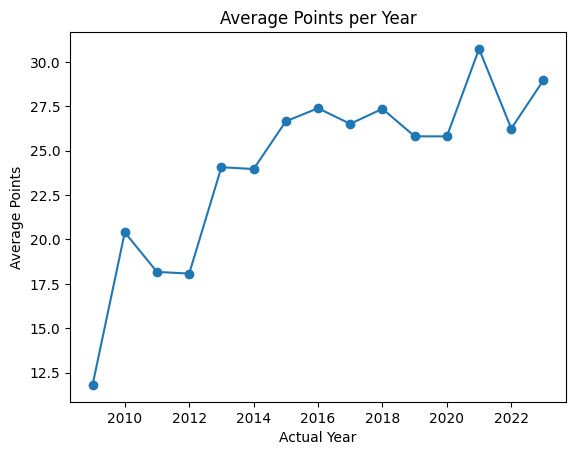

In [13]:
df_grouped = df.groupby('Actual_Year')['PTS'].mean().reset_index()
# Plot the line chart
plt.plot(df_grouped['Actual_Year'], df_grouped['PTS'], marker='o')
plt.title('Average Points per Year')
plt.xlabel('Actual Year')
plt.ylabel('Average Points')
plt.show()

In [14]:
df.head()

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,STL,PF,TO,PTS,Month,Day,Start_Year,End_Year,Actual_Year,Actual_Date
Actual_Date,,,,,,,,,,,,,,,,,,,,,
14/4/2010,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,2,0,2,42,4,14,2009,2010,2010,2010-04-14
13/4/2010,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,2,4,2,17,4,13,2009,2010,2010,2010-04-13
11/4/2010,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,1,2,5,25,4,11,2009,2010,2010,2010-04-11
10/4/2010,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,3,5,3,29,4,10,2009,2010,2010,2010-04-10
7/4/2010,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,7,4,4,27,4,7,2009,2010,2010,2010-04-07


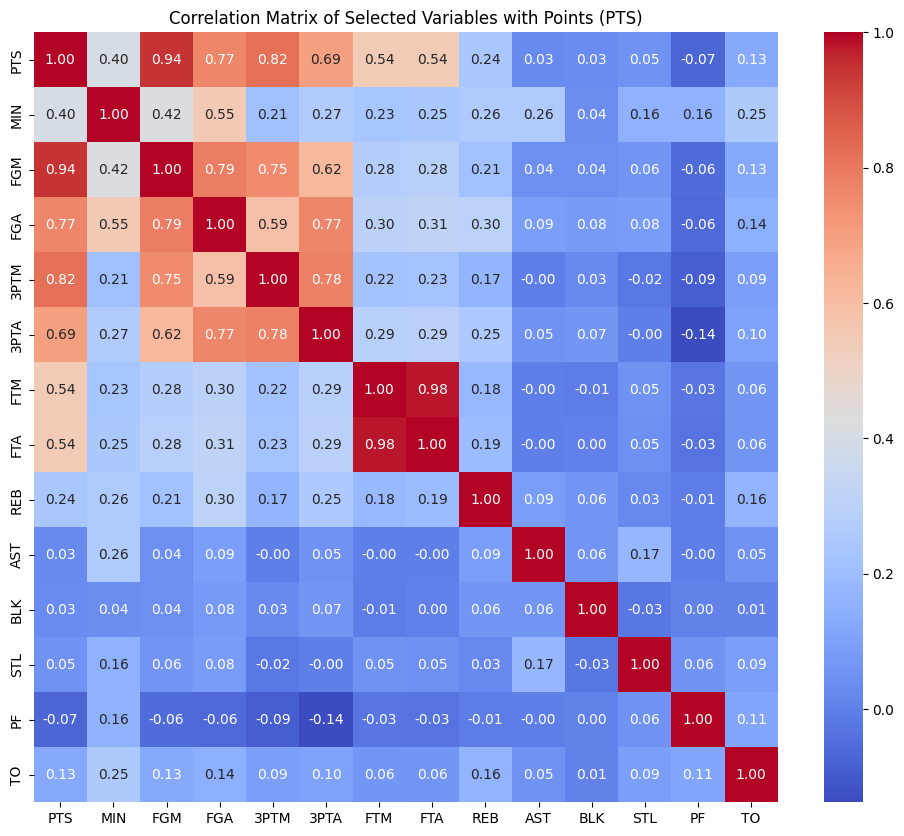

In [15]:
# Select relevant columns for correlation analysis
cols_of_interest = ['PTS', 'MIN', 'FGM', 'FGA', '3PTM', '3PTA', 'FTM', 'FTA', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO']
df_selected = df[cols_of_interest]

# Calculate correlation matrix
correlation_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables with Points (PTS)')
plt.show()

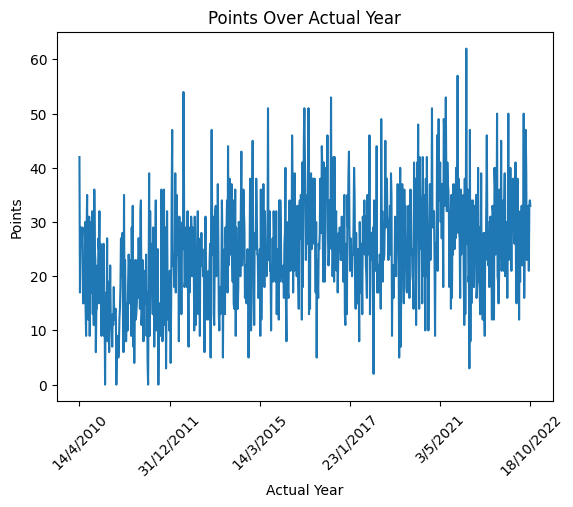

In [16]:
# Plot the line chart
plt.plot(df.index, df['PTS'])

selected_ticks = df.index[::len(df.index)//5]

# Set the x-axis ticks
plt.xticks(selected_ticks, rotation=45)


plt.title('Points Over Actual Year')
plt.xlabel('Actual Year')
plt.ylabel('Points')
plt.show()

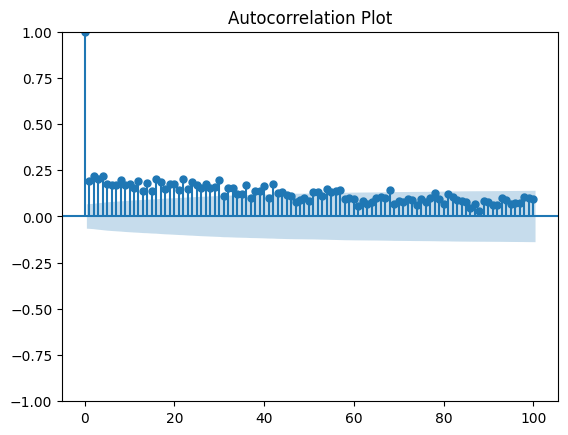

In [17]:
# Replace it with your actual data
your_series = df['PTS'].values

# Draw autocorrelation plot
plot_acf(your_series, lags=100)  # 'lags' parameter sets the number of time lags to display
plt.title('Autocorrelation Plot')
plt.show()

In [18]:
# Assuming df is your DataFrame

# Feature selection
features = ['OPP']
X = df[features]
y = df['PTS']

# One-hot encode the 'OPP' column
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop the first category to avoid multicollinearity
X_encoded = encoder.fit_transform(X)

# Model training
model = LinearRegression()
model.fit(X_encoded, y)

# User input for the opposition team
user_opp = input("Enter the opposition team for Curry's next game: ")

# Transform user input using the encoder
user_input_encoded = encoder.transform([[user_opp]])

# Making a prediction based on user input
predicted_pts = model.predict(user_input_encoded)

# Display the predicted PTS
print(f'Predicted PTS for the next game against {user_opp}: {predicted_pts[0]}')


/Users/joezouki/Library/Python/3.11/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Predicted PTS for the next game against CHI: 22.75999999999998


/Users/joezouki/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
